In [1]:
import pandas as pd
import numpy as np


df_weight = pd.read_csv('df_weight')
df_weight.head()

,4-aminobenzoic acid,aclarubicin,adenosine triphosphate,alfentanil,aluminum hydroxide,mitomycin,ammonium chloride,belladonna alkaloids,boric acid,calcium phosphate,...,EYE,CONG,METAB,BLOOD,STAT,DEV,MENTAL,HEARING,ID,Label
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.029630
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.045685
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015936
3,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.102639
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.117073


In [ ]:
'''10% XGBoost Search'''
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


def fit_xgb_classifier3(df_weight, lr, d, gam, a, sub, spw):
    
    X = df_weight.iloc[:,:-1]
    X = X.drop(X.columns[X.sum() == 0], axis=1)
    
    y = df_weight.iloc[:,-1]
    y_binary = [1 if a<-.1 else 0 for a in df_weight.iloc[:,-1]]
    y_binary = pd.DataFrame(y_binary)
       
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42)   
    
    
    model = XGBClassifier(max_depth=d, subsample=sub, scale_pos_weight=spw, learning_rate=lr, gamma=gam, 
                          alpha=a, random_state=2)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # predict probabilities
    xgb_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    xgb_probs = xgb_probs[:, 1]
    
    # calculate scores
    xgb_auc = roc_auc_score(y_test, xgb_probs)
    
    # summarize scores
    print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
    
    
    return X_train, X_test, y_train, y_test, model, xgb_auc

def xgboost_grid_search():
    '''
    Personal function written to perform xgboost grid search
    '''
    learning_rates = [0.01, 0.03, 0.1]
    max_depths = [2, 3, 4, 5, 6]
    gammas = [0, .1]
    alphas = [0, 0.1, 0.5]
    subsamples = [0.5, 0.75, 1]

    aucs = []
    params = []
    spw=0.8
    for lr in learning_rates:
        for d in max_depths:
            for gam in gammas:
                for a in alphas:
                    for sub in subsamples:
                        #print(lr,d, gam, a, sub, spw)
                        X_train, X_test, y_train, y_test, model, xgb_auc = fit_xgb_classifier3(df_weight,lr, 
                                                                                           d, gam, a, sub, spw)
                        aucs.append(xgb_auc)
                        params.append([lr, d, gam, a, sub, spw])

    print('max_auc: ', max(aucs))
    aucs = np.array(aucs)
    print('best parameters: ', params[np.argmax(aucs)])
    
    return params[np.argmax(aucs)]

best_params = xgboost_grid_search()

XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.610
XGBoost: ROC AUC=0.606
XGBoost: ROC AUC=0.621
XGBoost: ROC AUC=0.618
XGBoost: ROC AUC=0.606
XGBoost: ROC AUC=0.615
XGBoost: ROC AUC=0.610
XGBoost: ROC AUC=0.595
XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.610
XGBoost: ROC AUC=0.606
XGBoost: ROC AUC=0.621
XGBoost: ROC AUC=0.618
XGBoost: ROC AUC=0.606
XGBoost: ROC AUC=0.615
XGBoost: ROC AUC=0.610
XGBoost: ROC AUC=0.595
XGBoost: ROC AUC=0.624
XGBoost: ROC AUC=0.630
XGBoost: ROC AUC=0.619
XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.627
XGBoost: ROC AUC=0.619
XGBoost: ROC AUC=0.613
XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.611
XGBoost: ROC AUC=0.624
XGBoost: ROC AUC=0.630
XGBoost: ROC AUC=0.619
XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.627
XGBoost: ROC AUC=0.619
XGBoost: ROC AUC=0.613
XGBoost: ROC AUC=0.622
XGBoost: ROC AUC=0.611
XGBoost: ROC AUC=0.626
XGBoost: ROC AUC=0.627
XGBoost: ROC AUC=0.627
XGBoost: ROC AUC=0.624
XGBoost: ROC AUC=0.625
XGBoost: ROC AUC=0.627
XGBoost: ROC AUC=0.619
XGBoost: RO

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

learning_rates = [0.01, 0.03, 0.1]
max_depths = [2, 3, 4, 5, 6]
gammas = [0, .1]
alphas = [0, 0.1, 0.5]
subsamples = [0.5, 0.75, 1]

def fit_xgb_classifier3(df_weight, lr, d, gam, a, sub, spw):
    
    X = df_weight.iloc[:,:-1]
    X = X.drop(X.columns[X.sum() == 0], axis=1)
    
    y = df_weight.iloc[:,-1]
    y_binary = [1 if a<-.1 else 0 for a in df_weight.iloc[:,-1]]
    y_binary = pd.DataFrame(y_binary)
       
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42)   
    
    
    model = XGBClassifier(max_depth=d, subsample=sub, scale_pos_weight=spw, learning_rate=lr, gamma=gam, 
                          alpha=a, random_state=2)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    
    # predict probabilities
    xgb_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    xgb_probs = xgb_probs[:, 1]
    
    # calculate scores
    xgb_auc = roc_auc_score(y_test, xgb_probs)
    
    # summarize scores
    print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
    
    
    return X_train, X_test, y_train, y_test, model, xgb_auc

X_train, X_test, y_train, y_test, model, xgb_auc = fit_xgb_classifier3(df_weight, 0.01, 6, 0.1, 0.5, 0.75, 0.8)

XGBoost: ROC AUC=0.632


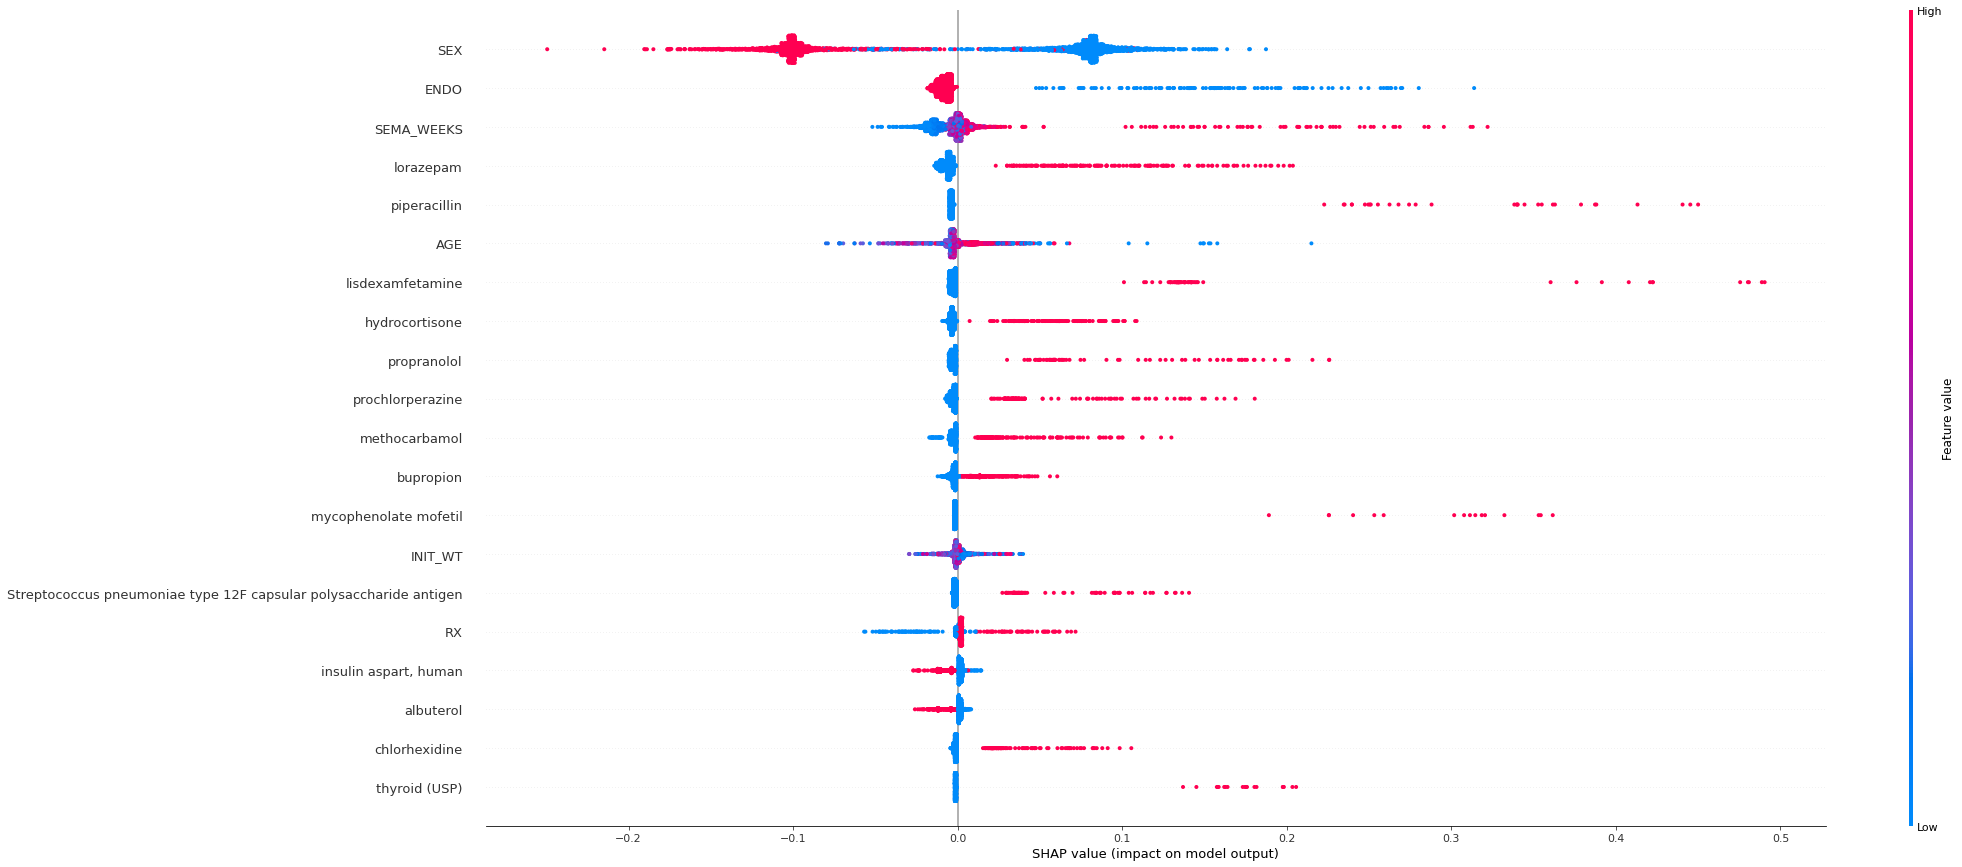

In [6]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column names
                             show=False, #Set to false to output to folder
                             plot_size=(30,15)) # Change plot size



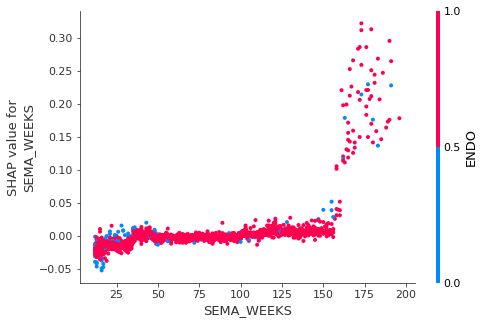

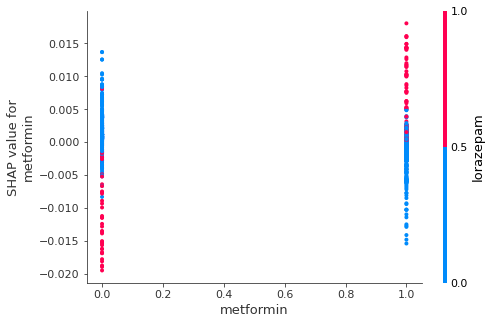

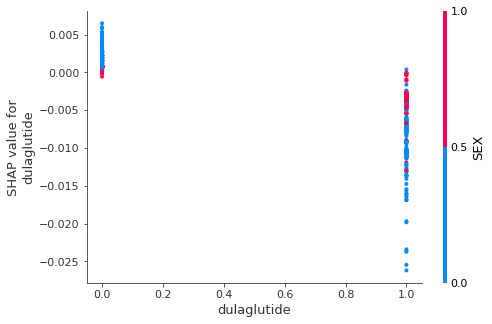

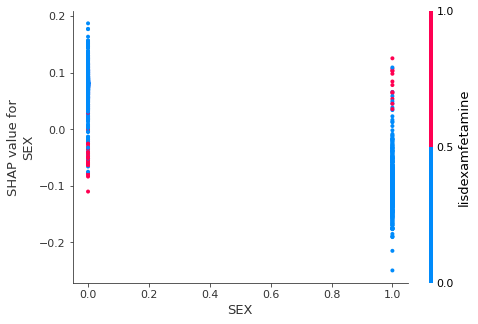

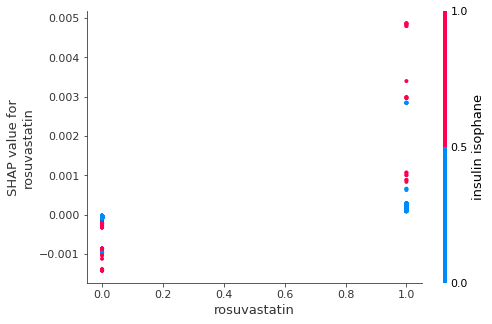

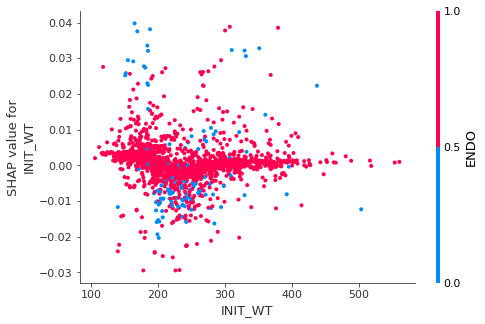

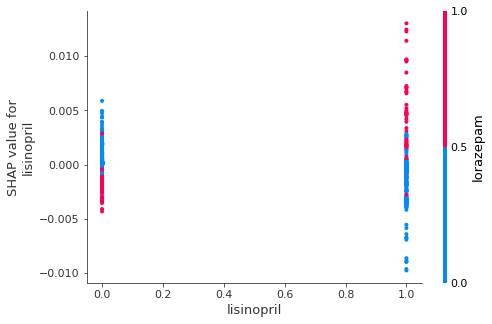

In [7]:
features = ['SEMA_WEEKS', 'metformin', 'dulaglutide', 'SEX',
            'rosuvastatin', 'INIT_WT', 'lisinopril']

for feature in features:
    shap.dependence_plot(feature, shap_values, X_train)

In [11]:
'''
Implementing the Repeated Cross-Validations - 10%
'''
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')

def write_shap_dict(df_weight):
    '''
    Function to write the empty dictionary for the SHAP values
    '''
    X = df_weight.iloc[:,:-1]
    X = X.drop(X.columns[X.sum() == 0], axis=1)
    y_binary = [1 if a<-.1 else 0 for a in df_weight.iloc[:,-1]]
    y_binary = pd.DataFrame(y_binary)

    
    np.random.seed(31)
    CV_repeats = 10

    # Make a list of random integers between 0 and 10000 of length = CV_repeats to act as different data splits
    random_states = np.random.randint(10000, size=CV_repeats) 

    #Dictionary to keep track of the SHAP values of each observation per CV repition
    shap_values_per_cv = {}
    for sample in X.index:
        #create keys for each sample
        shap_values_per_cv[sample] = {}
        #keys for each CV fold within each sample
        for CV_repeat in range(CV_repeats):
            shap_values_per_cv[sample][CV_repeat] = {}
            
    return shap_values_per_cv, random_states
            
shap_values_per_cv, random_states = write_shap_dict(df_weight)

def xgboost_cv(df_weight, lr, d, gam, a, sub, spw, shap_values_per_cv, random_states):
    '''
    Performing the Cross-Validation
    '''

    X = df_weight.iloc[:,:-1]
    X = X.drop(X.columns[X.sum() == 0], axis=1)
    y = [1 if a<-.1 else 0 for a in df_weight.iloc[:,-1]]
    y = pd.DataFrame(y)
    
    CV_repeats=10

    for i, CV_repeat in enumerate(range(CV_repeats)):
        #Verbose 
        print('\n------------ CV Repeat number:', CV_repeat)

        #Cross-Validations
        CV = KFold(n_splits=5, shuffle=True, random_state = random_states[i])
        ix_training, ix_test = [], []

        #Loop through the CV fold and put the train and test indices into the empty lists above
        for fold in CV.split(df_weight):
            ix_training.append(fold[0])
            ix_test.append(fold[1])
        
        #Loop through outer folds and extract SHAP values
        for i, (train_outer_ix, test_outer_ix) in enumerate(zip(ix_training, ix_test)):
            #Verbose
            print('\n------ Fold Number:',i)

            X_train, X_test = X.iloc[train_outer_ix, :], X.iloc[test_outer_ix, :]
            y_train, y_test = y.iloc[train_outer_ix], y.iloc[test_outer_ix] #Potential fix for the type of y here


            model = XGBClassifier(max_depth=d, subsample=sub, scale_pos_weight=spw, learning_rate=lr, gamma=gam, 
                          alpha=a, random_state=2)
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
                
            # predict probabilities
            xgb_probs = model.predict_proba(X_test)
            # keep probabilities for the positive outcome only
            xgb_probs = xgb_probs[:, 1]
            
            # calculate scores
            xgb_auc = roc_auc_score(y_test, xgb_probs)

            # summarize scores
            print('XGBoost: ROC AUC=%.3f' % (xgb_auc))

            # Use SHAP to explain predictions
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)

            # Extract SHAP information per fold per sample 
            for i, test_index in enumerate(test_outer_ix):
                shap_values_per_cv[test_index][CV_repeat] = shap_values[i] #-#-#
                
    return shap_values_per_cv

shap_values_per_cv = xgboost_cv(df_weight, 0.01, 6, 0.1, 0.5, 0.75, 0.8, shap_values_per_cv, random_states)


------------ CV Repeat number: 0

------ Fold Number: 0
XGBoost: ROC AUC=0.602

------ Fold Number: 1
XGBoost: ROC AUC=0.605

------ Fold Number: 2
XGBoost: ROC AUC=0.616

------ Fold Number: 3
XGBoost: ROC AUC=0.601

------ Fold Number: 4
XGBoost: ROC AUC=0.603

------------ CV Repeat number: 1

------ Fold Number: 0
XGBoost: ROC AUC=0.553

------ Fold Number: 1
XGBoost: ROC AUC=0.640

------ Fold Number: 2
XGBoost: ROC AUC=0.625

------ Fold Number: 3
XGBoost: ROC AUC=0.608

------ Fold Number: 4
XGBoost: ROC AUC=0.562

------------ CV Repeat number: 2

------ Fold Number: 0
XGBoost: ROC AUC=0.603

------ Fold Number: 1
XGBoost: ROC AUC=0.618

------ Fold Number: 2
XGBoost: ROC AUC=0.554

------ Fold Number: 3
XGBoost: ROC AUC=0.612

------ Fold Number: 4
XGBoost: ROC AUC=0.612

------------ CV Repeat number: 3

------ Fold Number: 0
XGBoost: ROC AUC=0.609

------ Fold Number: 1
XGBoost: ROC AUC=0.607

------ Fold Number: 2
XGBoost: ROC AUC=0.612

------ Fold Number: 3
XGBoost: ROC 

Text(0.5, 1.0, 'Average SHAP values after 10x cross-validation')

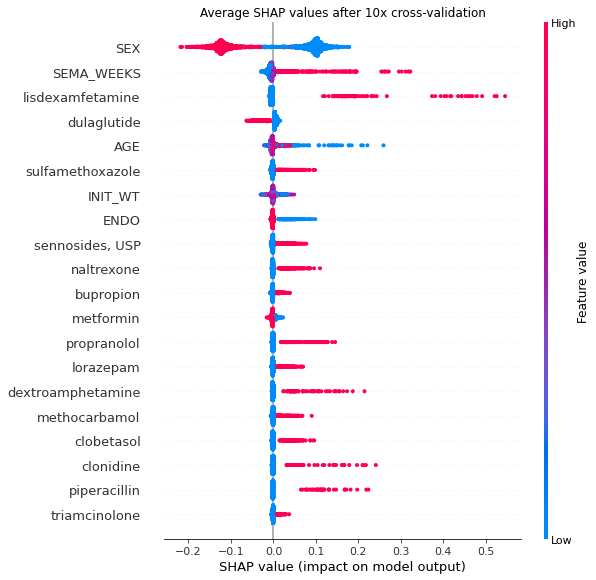

In [12]:
'''
Getting the Shap Plots of the average values from the Cross-Validations
'''
X = df_weight.iloc[:,:-1]
X = X.drop(X.columns[X.sum() == 0], axis=1)
y = [1 if a<-.1 else 0 for a in df_weight.iloc[:,-1]]
y = pd.DataFrame(y)

average_shap_values, stds, ranges = [], [], []

for i in range(0, len(df_weight)):
    # Get all SHAP values for sample number i
    df_per_obs = pd.DataFrame.from_dict(shap_values_per_cv[i]) 
    # Get relevant statistics for every sample 
    average_shap_values.append(df_per_obs.mean(axis=1).values) 
    stds.append(df_per_obs.std(axis=1).values)
    ranges.append(df_per_obs.max(axis=1).values-df_per_obs.min(axis=1).values)


shap.summary_plot(np.array(average_shap_values), X, show = False)
plt.title('Average SHAP values after 10x cross-validation')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ranges = pd.DataFrame(ranges)
ranges.columns = X.columns

# Transpose dataframe to long form
values, labels = [],[]
for i in range(len(ranges.columns)):
    for j in range(len(ranges)):
        values.append(ranges.T[j][i])
        labels.append(ranges.columns[i])
long_df = pd.DataFrame([values,labels]).T ; long_df.columns = ['Values', 'Features']

shap_features = ['SEX', 'SEMA_WEEKS', 'dulaglutide']
long_df = long_df[long_df['Features'].isin(shap_features)]

title = 'Range of SHAP values per sample across all\ncross-validation repeats'
xlab, ylab = 'SHAP Value Variability', 'SHAP range per sample'
sns.catplot(data = long_df, x = 'Features', y = 'Values').set(xlabel = xlab, ylabel = ylab,
                                                                            title = title)
plt.xticks(rotation=45)

In [ ]:
'''
The standardized Shapley Ranges Plot
'''
long_df['Values'] = pd.to_numeric(long_df['Values'], downcast='float')
mean_abs_effects = long_df.groupby(['Features']).mean()

standardized = long_df.groupby(long_df.Features).transform(lambda x: x/x.mean()) ; standardized['Features'] = long_df.Features

title = 'Scaled Range of SHAP values per sample \nacross all cross-validation repeats'
sns.catplot(data = standardized, x = 'Features', y = 'Values').set(xlabel = 'SHAP Value Variability Scaled by Mean', 
                                                                            title = title)
plt.xticks(rotation=45)

In [2]:
pip install xgboost

     |████████████████████████████████| 255.9 MB 47 kB/s              
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_latest_p37/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
